# OASIS INFOBYTE INTERNSHIP TASK 


In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sb
import plotly.express as px

import warnings
warnings.filterwarnings("ignore")

In [2]:
dataframe = pd.read_csv('Unemployment in India.csv')
dataframe_2020 = pd.read_csv('Unemployment_Rate_upto_11_2020.csv')

# Data Preprocessing 

In [3]:
dataframe.head()

Region         Date  Frequency   Estimated Unemployment Rate (%)  \
0  Andhra Pradesh   31-05-2019    Monthly                              3.65   
1  Andhra Pradesh   30-06-2019    Monthly                              3.05   
2  Andhra Pradesh   31-07-2019    Monthly                              3.75   
3  Andhra Pradesh   31-08-2019    Monthly                              3.32   
4  Andhra Pradesh   30-09-2019    Monthly                              5.17   

    Estimated Employed   Estimated Labour Participation Rate (%)   Area  
0           11999139.0                                     43.24  Rural  
1           11755881.0                                     42.05  Rural  
2           12086707.0                                     43.50  Rural  
3           12285693.0                                     43.97  Rural  
4           12256762.0                                     44.68  Rural

In [4]:
dataframe.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 7 columns):
 #   Column                                    Non-Null Count  Dtype  
---  ------                                    --------------  -----  
 0   Region                                    740 non-null    object 
 1    Date                                     740 non-null    object 
 2    Frequency                                740 non-null    object 
 3    Estimated Unemployment Rate (%)          740 non-null    float64
 4    Estimated Employed                       740 non-null    float64
 5    Estimated Labour Participation Rate (%)  740 non-null    float64
 6   Area                                      740 non-null    object 
dtypes: float64(3), object(4)
memory usage: 42.1+ KB


In [5]:
dataframe.columns

Index(['Region', ' Date', ' Frequency', ' Estimated Unemployment Rate (%)',
       ' Estimated Employed', ' Estimated Labour Participation Rate (%)',
       'Area'],
      dtype='object')

In [6]:
dataframe[' Date'] = pd.to_datetime(dataframe[' Date'])
dataframe['Area'] = dataframe['Area'].astype('category')
dataframe = dataframe.drop([' Frequency'], axis = 1)

In [23]:
import calendar
# Extract year and month from 'Date' column
dataframe['Year'] = dataframe[' Date'].dt.year
dataframe['Month'] = dataframe[' Date'].dt.month
dataframe['Month'] = dataframe['Month'].astype(int)
dataframe['Month_Name'] = dataframe['Month'].apply(lambda x: calendar.month_abbr[x])

In [24]:
dataframe.head(3)

Region       Date   Estimated Unemployment Rate (%)  \
0  Andhra Pradesh 2019-05-31                              3.65   
1  Andhra Pradesh 2019-06-30                              3.05   
2  Andhra Pradesh 2019-07-31                              3.75   

    Estimated Employed   Estimated Labour Participation Rate (%)   Area  Year  \
0           11999139.0                                     43.24  Rural  2019   
1           11755881.0                                     42.05  Rural  2019   
2           12086707.0                                     43.50  Rural  2019   

   Month Month_Name  
0      5        May  
1      6        Jun  
2      7        Jul

In [25]:
dataframe.shape

(740, 9)

In [26]:
dataframe.describe()

Date   Estimated Unemployment Rate (%)  \
count                            740                        740.000000   
mean   2019-12-12 18:36:58.378378496                         11.787946   
min              2019-05-31 00:00:00                          0.000000   
25%              2019-08-31 00:00:00                          4.657500   
50%              2019-11-30 00:00:00                          8.350000   
75%              2020-03-31 00:00:00                         15.887500   
max              2020-06-30 00:00:00                         76.740000   
std                              NaN                         10.721298   

        Estimated Employed   Estimated Labour Participation Rate (%)  \
count         7.400000e+02                                740.000000   
mean          7.204460e+06                                 42.630122   
min           4.942000e+04                                 13.330000   
25%           1.190404e+06                                 38.062500   
50%           4.744178e+06                                 41.160000   
75%           1.127549e+07                                 45.505000   
max           4.577751e+07                                 72.570000   
std           8.087988e+06                                  8.111094   

              Year       Month  
count   740.000000  740.000000  
mean   2019.418919    6.390541  
min    2019.000000    1.000000  
25%    2019.000000    4.000000  
50%    2019.000000    6.000000  
75%    2020.000000    9.000000  
max    2020.000000   12.000000  
std       0.493716    3.235070

In [27]:
dataframe.isna().sum()

Region                                      0
 Date                                       0
 Estimated Unemployment Rate (%)            0
 Estimated Employed                         0
 Estimated Labour Participation Rate (%)    0
Area                                        0
Year                                        0
Month                                       0
Month_Name                                  0
dtype: int64

In [28]:
dataframe = dataframe.dropna()

In [29]:
dataframe.isna().sum()

Region                                      0
 Date                                       0
 Estimated Unemployment Rate (%)            0
 Estimated Employed                         0
 Estimated Labour Participation Rate (%)    0
Area                                        0
Year                                        0
Month                                       0
Month_Name                                  0
dtype: int64

In [30]:
dataframe.shape

(740, 9)

In [31]:
dataframe.duplicated()

0      False
1      False
2      False
3      False
4      False
       ...  
749    False
750    False
751    False
752    False
753    False
Length: 740, dtype: bool

In [32]:
dataframe_2020.head()

Region         Date  Frequency   Estimated Unemployment Rate (%)  \
0  Andhra Pradesh   31-01-2020          M                              5.48   
1  Andhra Pradesh   29-02-2020          M                              5.83   
2  Andhra Pradesh   31-03-2020          M                              5.79   
3  Andhra Pradesh   30-04-2020          M                             20.51   
4  Andhra Pradesh   31-05-2020          M                             17.43   

    Estimated Employed   Estimated Labour Participation Rate (%) Region.1  \
0             16635535                                     41.02    South   
1             16545652                                     40.90    South   
2             15881197                                     39.18    South   
3             11336911                                     33.10    South   
4             12988845                                     36.46    South   

   longitude  latitude  
0    15.9129     79.74  
1    15.9129     79.74  
2    15.9129     79.74  
3    15.9129     79.74  
4    15.9129     79.74

In [33]:
dataframe_2020.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 267 entries, 0 to 266
Data columns (total 9 columns):
 #   Column                                    Non-Null Count  Dtype  
---  ------                                    --------------  -----  
 0   Region                                    267 non-null    object 
 1    Date                                     267 non-null    object 
 2    Frequency                                267 non-null    object 
 3    Estimated Unemployment Rate (%)          267 non-null    float64
 4    Estimated Employed                       267 non-null    int64  
 5    Estimated Labour Participation Rate (%)  267 non-null    float64
 6   Region.1                                  267 non-null    object 
 7   longitude                                 267 non-null    float64
 8   latitude                                  267 non-null    float64
dtypes: float64(4), int64(1), object(4)
memory usage: 18.9+ KB


In [34]:
dataframe_2020.columns

Index(['Region', ' Date', ' Frequency', ' Estimated Unemployment Rate (%)',
       ' Estimated Employed', ' Estimated Labour Participation Rate (%)',
       'Region.1', 'longitude', 'latitude'],
      dtype='object')

In [35]:
dataframe_2020[' Date'] = dataframe_2020[' Date']

In [36]:
dataframe_2020.shape

(267, 9)

In [37]:
dataframe_2020.isna().sum()

Region                                      0
 Date                                       0
 Frequency                                  0
 Estimated Unemployment Rate (%)            0
 Estimated Employed                         0
 Estimated Labour Participation Rate (%)    0
Region.1                                    0
longitude                                   0
latitude                                    0
dtype: int64

In [38]:
dataframe_2020

Region         Date  Frequency   Estimated Unemployment Rate (%)  \
0    Andhra Pradesh   31-01-2020          M                              5.48   
1    Andhra Pradesh   29-02-2020          M                              5.83   
2    Andhra Pradesh   31-03-2020          M                              5.79   
3    Andhra Pradesh   30-04-2020          M                             20.51   
4    Andhra Pradesh   31-05-2020          M                             17.43   
..              ...          ...        ...                               ...   
262     West Bengal   30-06-2020          M                              7.29   
263     West Bengal   31-07-2020          M                              6.83   
264     West Bengal   31-08-2020          M                             14.87   
265     West Bengal   30-09-2020          M                              9.35   
266     West Bengal   31-10-2020          M                              9.98   

      Estimated Employed   Estimated Labour Participation Rate (%) Region.1  \
0               16635535                                     41.02    South   
1               16545652                                     40.90    South   
2               15881197                                     39.18    South   
3               11336911                                     33.10    South   
4               12988845                                     36.46    South   
..                   ...                                       ...      ...   
262             30726310                                     40.39     East   
263             35372506                                     46.17     East   
264             33298644                                     47.48     East   
265             35707239                                     47.73     East   
266             33962549                                     45.63     East   

     longitude  latitude  
0      15.9129    79.740  
1      15.9129    79.740  
2      15.9129    79.740  
3      15.9129    79.740  
4      15.9129    79.740  
..         ...       ...  
262    22.9868    87.855  
263    22.9868    87.855  
264    22.9868    87.855  
265    22.9868    87.855  
266    22.9868    87.855  

[267 rows x 9 columns]

In [39]:
dataframe_2020.duplicated()

0      False
1      False
2      False
3      False
4      False
       ...  
262    False
263    False
264    False
265    False
266    False
Length: 267, dtype: bool

# Exploratory Analysis and visualizations

In [40]:
# Renaming the columns for easier access

df = dataframe.rename(columns={'Region': 'States', ' Date': 'Date',' Frequency': 'Frequency' ,
                        ' Estimated Unemployment Rate (%)': 'Est_Unemp_Rate', ' Estimated Employed': 'Est_Emp',
                        ' Estimated Labour Participation Rate (%)' : 'Est_Labour_Rate'}).reset_index(drop = True)


# Rounding estimated employed column for a better visualizing

# dataframe['Est_Emp'] = round((dataframe['Est_Emp']/1000000),2)

df.head(2)

States       Date  Est_Unemp_Rate     Est_Emp  Est_Labour_Rate  \
0  Andhra Pradesh 2019-05-31            3.65  11999139.0            43.24   
1  Andhra Pradesh 2019-06-30            3.05  11755881.0            42.05   

    Area  Year  Month Month_Name  
0  Rural  2019      5        May  
1  Rural  2019      6        Jun

In [41]:
# Selecting specific columns
dataframe_state = dataframe[[' Estimated Unemployment Rate (%)', ' Estimated Employed', ' Estimated Labour Participation Rate (%)']]

# Calculating descriptive statistics and rounding to 2 decimal places
descriptive_stats = round(dataframe_state.describe(), 2)
descriptive_stats

Estimated Unemployment Rate (%)   Estimated Employed  \
count                            740.00               740.00   
mean                              11.79           7204460.03   
std                               10.72           8087988.43   
min                                0.00             49420.00   
25%                                4.66           1190404.50   
50%                                8.35           4744178.50   
75%                               15.89          11275489.50   
max                               76.74          45777509.00   

        Estimated Labour Participation Rate (%)  
count                                    740.00  
mean                                      42.63  
std                                        8.11  
min                                       13.33  
25%                                       38.06  
50%                                       41.16  
75%                                       45.50  
max                                       72.57

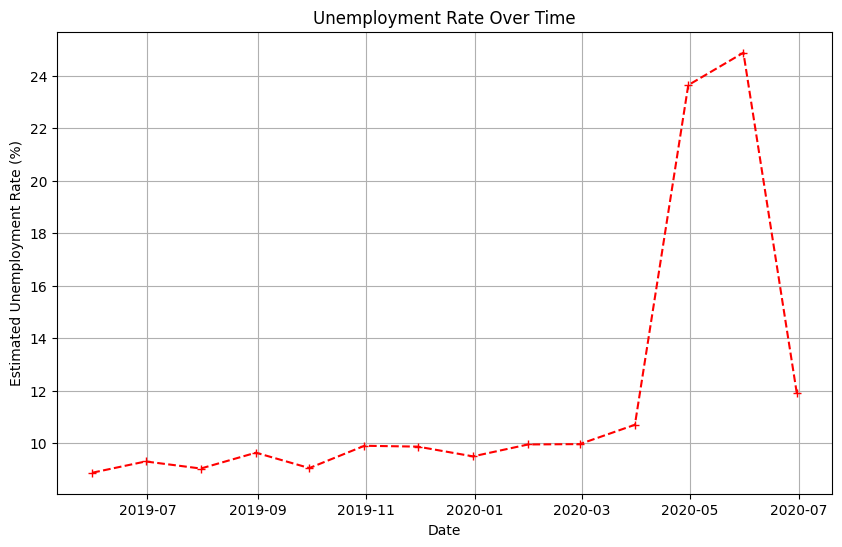

In [42]:
# Grouping the data by 'Date' and calculate the mean unemployment rate for each date

mean_unemployment_over_time = df.groupby('Date')['Est_Unemp_Rate'].mean()

# Create a line plot

plt.figure(figsize=(10, 6))
plt.plot(mean_unemployment_over_time.index, mean_unemployment_over_time.values, marker='+', linestyle='--', color='red')
plt.xlabel('Date')
plt.ylabel('Estimated Unemployment Rate (%)')
plt.title('Unemployment Rate Over Time')
plt.grid(True)

plt.show()

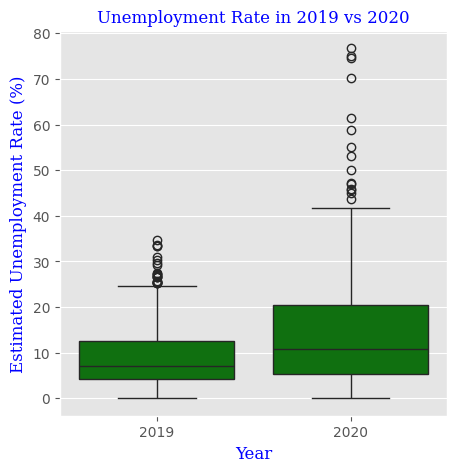

In [43]:
plt.figure(figsize=(5,5))
plt.style.use('ggplot')
sb.boxplot(y = df['Est_Unemp_Rate'], x = df['Year'], color ='green')

font = {'family': 'serif', 'color': 'blue', 'weight': 'normal', 'size': 12}
plt.xlabel('Year', fontdict=font)
plt.ylabel('Estimated Unemployment Rate (%)', fontdict=font)
plt.title('Unemployment Rate in 2019 vs 2020', fontdict=font)
plt.show()

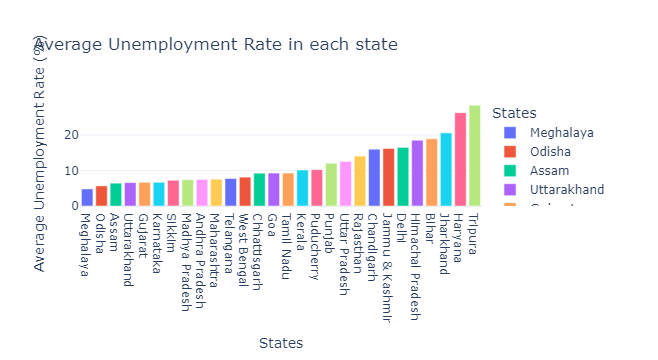

In [44]:
df_unemp = df[['Est_Unemp_Rate', 'States']].groupby('States').mean().reset_index()
df_unemp = df_unemp.sort_values('Est_Unemp_Rate')
fig = px.bar(df_unemp, x='States', y='Est_Unemp_Rate', color='States',
             labels={'States' : 'States', 'Est_Unemp_Rate' : 'Average Unemployment Rate (%)'},
             title='Average Unemployment Rate in each state', template='plotly_white')
fig.show()

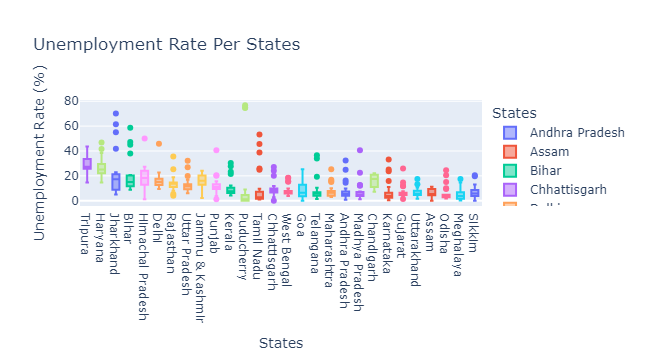

In [45]:
fig = px.box(df, x='States', y='Est_Unemp_Rate', color='States',
             labels={'States' : 'States', 'Est_Unemp_Rate' : 'Unemployment Rate (%)'},
             title='Unemployment Rate Per States', template='plotly')

fig.update_layout(xaxis={'categoryorder': 'total descending'})
fig.show()

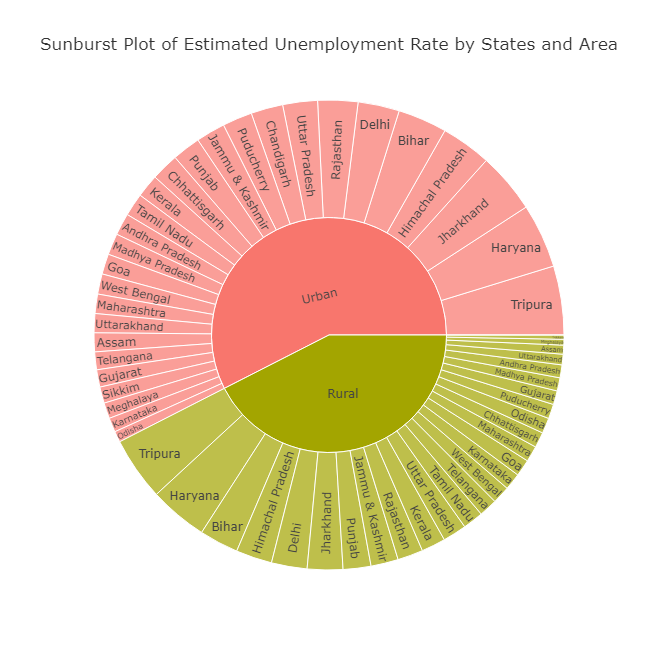

In [46]:
# Sunburst chart showing unemployment rate in each area and state

fig = px.sunburst(df, path=['Area', 'States'], values='Est_Unemp_Rate',
                  title='Sunburst Plot of Estimated Unemployment Rate by States and Area',
                  height=650, template='ggplot2')
fig.show()


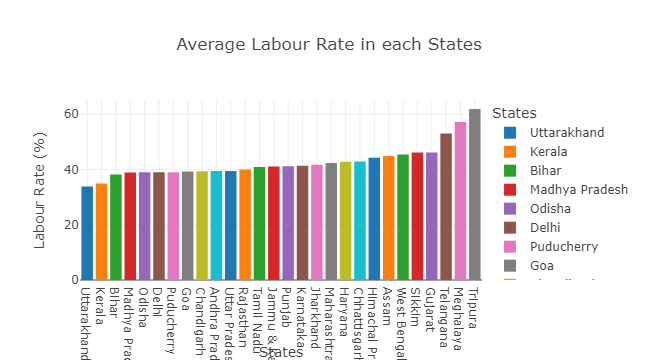

In [47]:
# Bar plot of average Labour Rate by States

df_lr = df[['Est_Labour_Rate', 'States']].groupby('States').mean().reset_index()
df_lr = df_lr.sort_values('Est_Labour_Rate')
fig = px.bar(df_lr, x='States', y='Est_Labour_Rate', color='States',
             labels={'States' : 'States', 'Est_Labour_Rate' : 'Labour Rate (%)'},
             title='Average Labour Rate in each States', template='gridon')
fig.show()

In [49]:
# Analysing the Area column

df.Area.value_counts(normalize = True)*100

Area
Urban    51.486486
Rural    48.513514
Name: proportion, dtype: float64

In [50]:
area_stats = df.groupby(['Area'])[['Est_Unemp_Rate', 'Est_Emp', 'Est_Labour_Rate']]
round(area_stats.describe(),2).T


Area                         Rural        Urban
Est_Unemp_Rate  count       359.00       381.00
                mean         10.32        13.17
                std          10.04        11.17
                min           0.00         0.00
                25%           3.79         5.82
                50%           6.76         9.97
                75%          13.76        18.04
                max          74.51        76.74
Est_Emp         count       359.00       381.00
                mean   10192852.57   4388625.58
                std     9847886.12   4411701.68
                min       49420.00     64538.00
                25%     2022981.00    778590.00
                50%     7508747.00   2821456.00
                75%    14752574.00   5756475.00
                max    45777509.00  17486683.00
Est_Labour_Rate count       359.00       381.00
                mean         44.46        40.90
                std           8.85         6.92
                min          13.33        20.51
                25%          39.05        37.42
                50%          42.56        40.21
                75%          48.15        44.18
                max          72.57        72.26

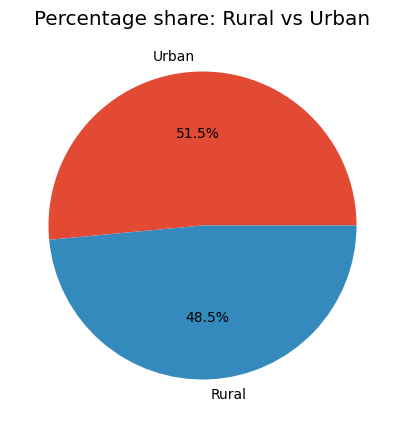

In [51]:
# Pie chart for Rural and Urban count

plt.figure(figsize=[6, 5])
plt.pie(df['Area'].value_counts(), labels=df['Area'].value_counts().index, autopct='%1.1f%%')
plt.title('Percentage share: Rural vs Urban')
plt.show()

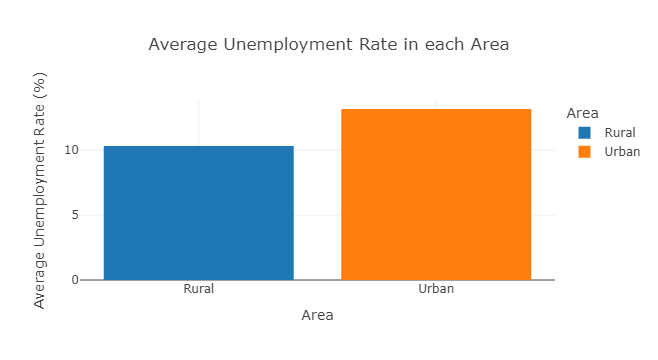

In [52]:
# Average Unemployment Rate in each Area

df_ar_unemp = df[['Est_Unemp_Rate', 'Area']].groupby('Area').mean().reset_index()
df_ar_unemp = df_ar_unemp.sort_values('Est_Unemp_Rate')
fig = px.bar(df_ar_unemp, x='Area', y='Est_Unemp_Rate', color='Area',
             labels={'Area' : 'Area', 'Est_Unemp_Rate' : 'Average Unemployment Rate (%)'},
             title='Average Unemployment Rate in each Area', template='gridon')
fig.show()

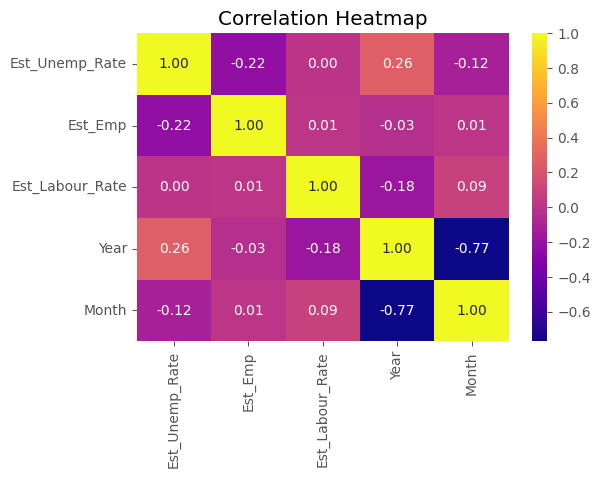

In [54]:
# Calculate correlation matrix

df_htmp = df[['Est_Unemp_Rate', 'Est_Emp', 'Est_Labour_Rate', 'Year', 'Month']].corr()
plt.figure(figsize=(6, 4))
sb.heatmap(df_htmp, annot=True, cmap='plasma', fmt='.2f')
plt.title('Correlation Heatmap')
plt.show()

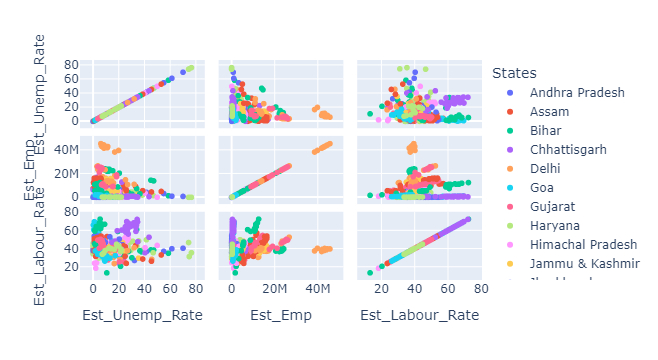

In [55]:
# Scatter matrix cosidering the employed and unemployed rates

fig = px.scatter_matrix(df, template='plotly',
                        dimensions=['Est_Unemp_Rate', 'Est_Emp', 'Est_Labour_Rate'],
                        color='States')
fig.show()

### Most Affected States/Union Territories

- Puducherry
- Jharkhand
- Bihar
- Haryana
- Tamil Nadu

### Observations

#### Unemployment Rate
- **Mean Unemployment Rate**: 11.79%
- **Median Unemployment Rate**: 8.35%
- **Standard Deviation of Unemployment Rate**: 10.72%

The Covid-19 pandemic lockdown in 2020 caused a sudden spike in unemployment rates, with particularly high rates (over 20%) observed in May and June. The states with the highest overall unemployment rates were:

- Tripura
- Haryana
- Jharkhand
- Bihar

Conversely, the states with the lowest overall unemployment rates were:

- Meghalaya
- Odisha
- Assam
- Uttarakhand

There was significant variability in the unemployment rates across all states, with a noticeable skew.

#### Labour Rate
- The labour rate exhibited high variability in 2020 due to the Covid-19 lockdown.
- There was a general downward trend in the labour rate across all states during 2020.

#### Rural vs Urban
- The mean and median unemployment rates were higher in urban areas.
- The dataset included an almost equal representation from both urban and rural areas.
- Both rural and urban areas saw higher unemployment rates in 2020 compared to 2019.
- Urban areas had a higher unemployment rate than rural areas.

#### Miscellaneous
- An inverse relationship was observed between unemployment rates and the number of employed people.
- The effect of the year on unemployment is evident from the correlation coefficient.
